# Hyperparameter Optimization for $(c_1, c_2)$ parameters of PSO.

Purpose:
* To discover the sweet spot in the $(c_1, c_2)$ space. 

In [1]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin"\
                r"\Evolutionary Design\Thesis Chapter\Chapter 2.0\Figures\Section 7"

In [2]:
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


In [35]:
import numpy as np 
from matplotlib.colors import LogNorm

import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.inferno)
plt.register_cmap(name='inferno', cmap=cmaps.inferno)
cmap = cmaps.inferno

In [60]:
def fig_modifier(ax_):
    """
    Modifies the current axis
    
    Arguments:
    ax_ -- current figure axis
    
    Returns:
    Modified ax_
    """
    ax_.xaxis.set_ticks_position('bottom')
    ax_.yaxis.set_ticks_position('left')

    ax_.set_xticks(range(15)); ax.set_yticks(range(15))

    ax_.set_xticks([0.0, 2, 4, 6, 8, 10, 12, 14])
    ax_.set_yticks([0.0, 2, 4, 6, 8, 10, 12, 14])
    ax_.set_xticklabels([0.0, 0.50, 1.0, 1.50, 2.0, 2.50, 3.0, 3.5], size = 7.5)
    ax_.set_yticklabels([0.0, 0.50, 1.0, 1.50, 2.0, 2.50, 3.0, 3.5][::-1],
                       size = 7.5)

    ax_.xaxis.set_tick_params(size = 2, width = 0.25,  pad=1)
    ax_.yaxis.set_tick_params(size = 2, width = 0.25,  pad=1)

    ax_.set_xlabel(r'$c_1$', fontsize = 15, labelpad = 2)
    ax_.set_ylabel(r'$c_2$', fontsize = 15, labelpad = 12, rotation = 0)

    ax_.tick_params(axis='both', which='major', pad=2)

    for line_pos in np.arange(0.50, 14.0, 1): 
        ax_.axvline(line_pos, 0, 3, linewidth = 0.50, color = 'white')
        ax_.axhline(line_pos, 0, 3, linewidth = 0.50, color = 'white')

In [46]:
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

### Common Data

In [6]:
data = np.load(r"\\storage01\data\AMOLF\users\singh\Lisa PSO Runs"
               r"\New - MSE Cost Function\Horizontal Target Curve"
               r"\Weight - 0.25\Data\best_cost_grid.npy")

## [1] Mean across the 100 PSO Runs

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


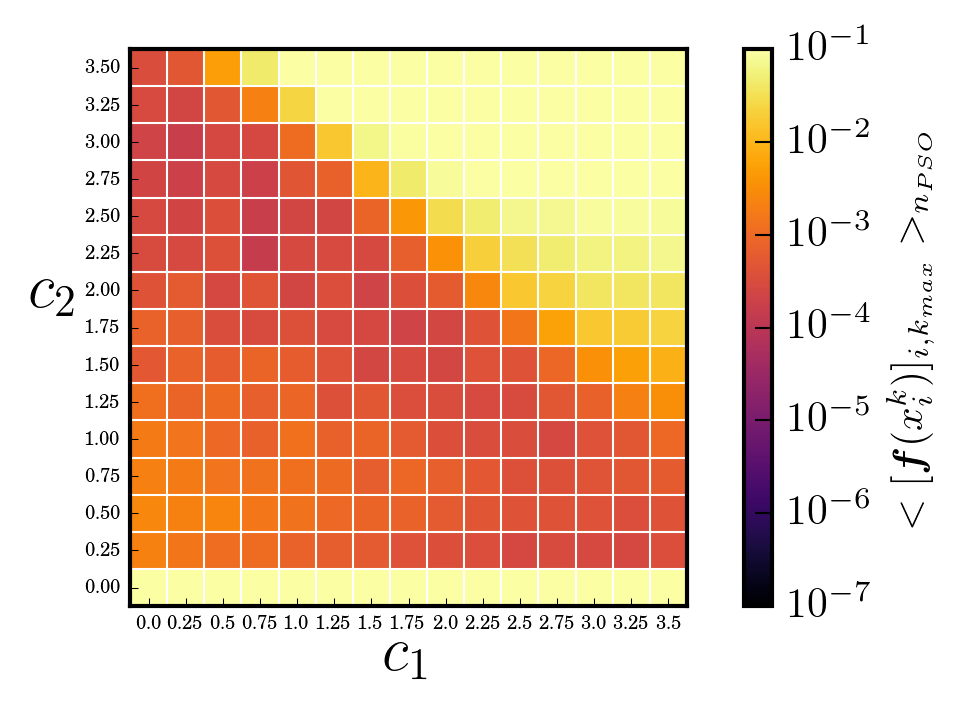

In [36]:
data_mean = np.mean(data, axis = 0)

fig, ax = plt.subplots(1)
p = plt.imshow(np.flipud(data_mean), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-7, vmax = 1e-1))

fig.colorbar(p,label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
fig_modifier(ax)

#plt.savefig(fig_save_path + "\hyper_param_mean.png", format='png',
#            bbox_inches='tight')
plt.show()

## [2] Extremal Value Statistics: Best across the 100 PSO Runs 

In [ ]:
data_extremal = np.amin(data, axis = 0)

fig, ax = plt.subplots(1)
p = plt.imshow(np.flipud(data_extremal), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-7, vmax = 1e-1))
fig.colorbar(p, label =r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$')

fig_modifier(ax)

#plt.savefig(fig_save_path + "\hyper_param_extremal.png", format='png',
#            bbox_inches='tight')
plt.show()

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


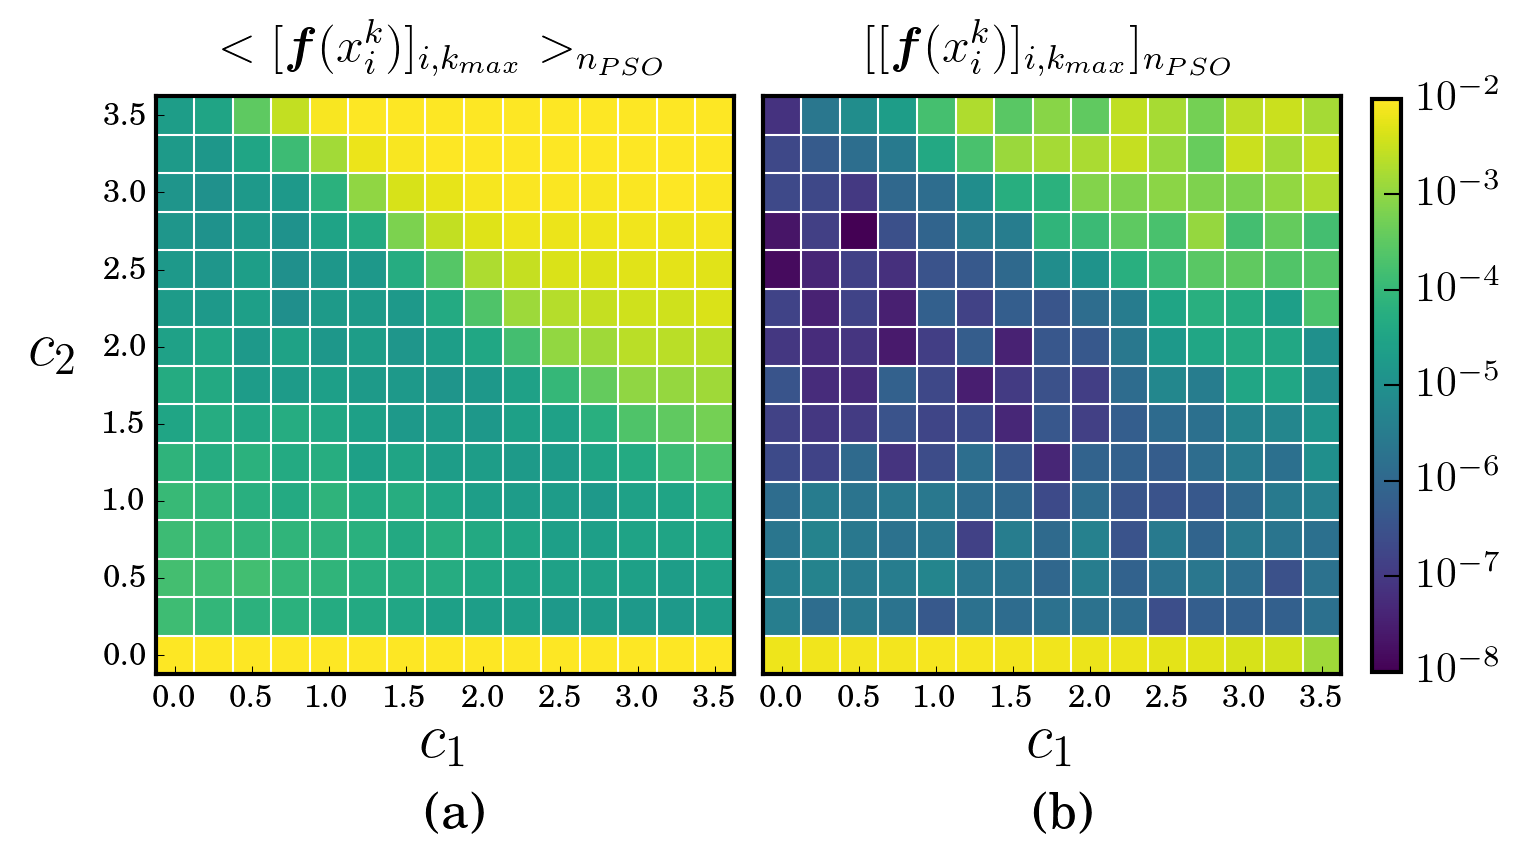

In [82]:
cmap = cmaps.viridis
fullfig(hf = 1.1)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.05)

data_mean = np.mean(data/16, axis = 0)
ax = ax1
p = ax.imshow(np.flipud(data_mean), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))

#fig.colorbar(p,label =r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
fig_modifier(ax1)
ax1.set_title(r'$<[\boldsymbol{f}(x_i^k)]_{i,k_{max}}}>_{n_{PSO}}$')
ax1.text(6.5,18.5,'(a)', size = 12)

data_extremal = np.amin(data/16, axis = 0)
ax = ax2
p = ax2.imshow(np.flipud(data_extremal), interpolation="nearest", 
               cmap = cmap, norm = LogNorm(vmin = 1e-8, vmax = 1e-2))
#plt.scatter([-100], [-100], c=[0], cmap=cmap, norm=norm)
plt.colorbar(p, ax = [ax1, ax2],fraction=0.023, pad=0.025)

ax2.set_title(r'$[[\boldsymbol{f}(x_i^k)]_{i,k_{max}}]_{n_{PSO}}$')
fig_modifier(ax2)
ax2.set_ylabel(""); ax2.set_yticks([])
ax2.text(6.5,18.5,'(b)', size = 12)

plt.savefig(r"C:\Users\singh\Dropbox\Nitin Singh\Thesis\Evolutionary Design\Figures\Section 7\hyper_param_opt.png", format='png',
            bbox_inches='tight')
